### 决策树回归

In [1]:
#使用波士顿房价
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

Decision Tree Regressor

In [2]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [3]:
dt_reg.score(X_train,y_train),dt_reg.score(X_test,y_test)#过拟合

(1.0, 0.6955883417293873)

####  学习曲线

##### 基于RMSE绘制学习曲线

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
def plot_learning_curve_rmse(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.show()
    
plot_learning_curve_rmse(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

<Figure size 640x480 with 1 Axes>

#### 基于R^2值绘制学习曲线

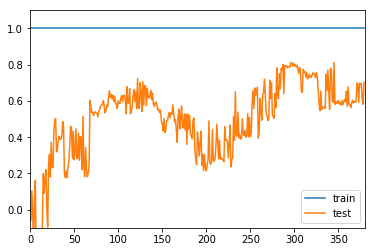

In [5]:
from sklearn.metrics import r2_score

def plot_learning_curve_r2(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(r2_score(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(r2_score(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               train_score, label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               test_score, label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, -0.1, 1.1])
    plt.show()
    
plot_learning_curve_r2(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

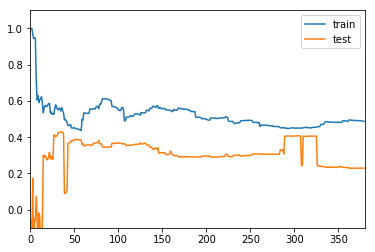

In [6]:
##max_depth参数为例
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=1), X_train, X_test, y_train, y_test)

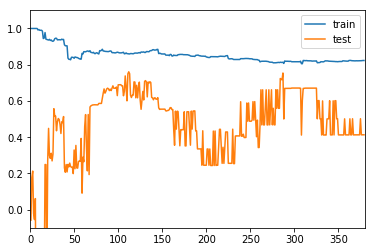

In [7]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=3), X_train, X_test, y_train, y_test)

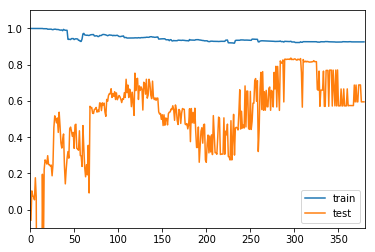

In [8]:
plot_learning_curve_r2(DecisionTreeRegressor(max_depth=5), X_train, X_test, y_train, y_test)

### 复杂度曲线{忘了。。。。}

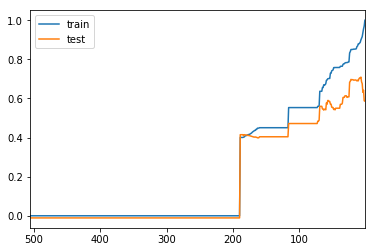

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

maxSampleLeaf = 506
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(506, 1)
plt.legend()
plt.show()

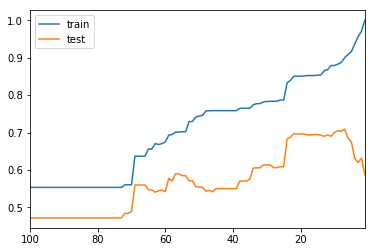

In [10]:
maxSampleLeaf = 100
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(maxSampleLeaf, 1)
plt.legend()
plt.show()

## 并查集的局限性

In [11]:
##使用鸢尾花数据集
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2,criterion="entropy")
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(#meshgrid,用向量生成坐标矩阵
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]#ravel遍历，c_(合并)降维
    y_predict = model.predict(X_new)
    boundary = y_predict.reshape(x0.shape)
    #ListedColormap,生成非渐变的颜色映射
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,boundary,cmap=custom_cmap)

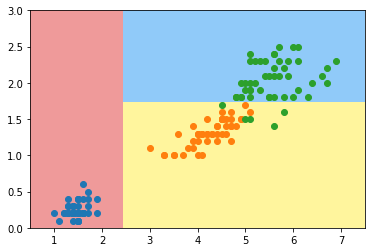

In [13]:
plot_decision_boundary(tree_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [14]:
X_new = np.delete(X,138,axis=0)
y_new = np.delete(y,128)
X_new.shape,y_new.shape

((149, 2), (149,))

In [15]:
tree_clf2 = DecisionTreeClassifier(max_depth = 2,criterion="entropy")
tree_clf2.fit(X_new,y_new)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

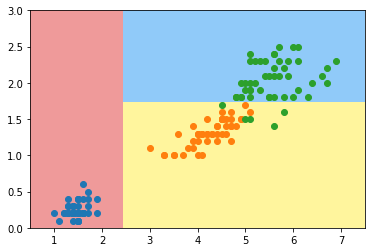

In [16]:
plot_decision_boundary(tree_clf2,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()
##删除一个样本，决策边界变化了，高度样本相关（高度敏感）
##极度需要调参